Znajdowanie najkrótszych ścieżek w grafach ważonych

Reprezentacja grafów ważonych:
    </br></br>
    $G=(V,E)$ </br>
    $w=E \to N (\Z ,\R \to \mathbb{Q}) $ </br>
1. Reprezentacja macierzowa: </br>
$W$ - macierz wag </br>
$W[i][j]$ - waga krawędzi między wierzchołkami $v_i$ oraz $v_j$ ($\infty$ jeżeli nie istnieje) </br>
2. Reprezentacja listowa: </br>
Tak samo jak zwykła reprezentacja, przy czym na $i$-tej pozycji w liście mamy listę dwuelementową z informacją o skierowaniu na inny wierzchołek, a druga wartość to waga tego połączenia. </br>

Problem znajowania najkrótszych ścieżek:
- 1:1, problem ścieżki między dwoma wierzchołkami - na elementarnym poziomie trudne do wykorzystania
- 1:wszyscy, problem ścieżki z zadanego wierzchołka do wszystkich innych
- wszyscy:wszyscy 

Podejście elementarne/BFS:
- długości/wagi krawędzi to małe liczby naturalne
- tworzymy sztuczne wierzchołki odpowiednio dzielące krawędzie (dla wagi $n$, wkładamy $n-1$ wierzchołków, aby wydłuzyć odległości)

Implementacja: 
- wrzucamy do kolejki częściowe wierzchołki i aktualizujemy odległości, jeśli wyciągniemy prawdziwy wierzchołek.

Algorytm Dijkstry - algorytm elementarny, ale w każdym kroku skacze do najbliższego prawdziwego wierzchołka:
- liczby nie muszą być naturalne, ale nie moga być ujemne.

1. Notacja:
    - $G=(V,E)$
    - $w(u,v)$ - odległość z $u$ do $v$
    - $u.d$ - oszacowanie odległości ze źródla do $u$
    - $u.parent$ - poprzednik na najkrótszej ścieżce ze źródła

2. Algorytm: (start $=s\in V$)
    - umieść wszystkie wierzchołki w kolejce priorytetowej z oszacowaniem odległości $u.d=\infty$ (w praktyce realizowane inaczej)
    - zmień odległość $s$ na $0$
    - póki wierzchołki są w kolejce:
        - wyjmij z kolejki wierzchołek $u$ od minimalnej wartości $u.d$
        - dla każdej krawędzi $(u,v)$ wykonaj relaksację (sprawdź warunek trójkąta, czyli czy da się lepiej podejść do wierzchołka) 

3. Dowód poprawności:
    - realizuje BFS z dodanymi wierzchołkami (nieprawdiłowy argument, jeśli wagi nie są naturalne)
    - dowód przez indukcję...

4. Złożonosć:
    - $O(ElogV)$ dla reprezentacji listowej - użycie kolejki priorytetowej
    - $O(V^2)$ dla reprezentacji macierzowej - po prostu szukamy dla każdego wierzchołka

In [20]:
def Dijkstra(G,s):
    from math import inf
    from queue import PriorityQueue
    n=len(G)
    Q=PriorityQueue()
    parent=[None for _ in range(n)]
    d=[inf for _ in range(n)]
    d[s]=0
    Q.put((d[s],s))
    
    while not Q.empty():
        w,u=Q.get()
        # print(w,u)
        if w==d[u]: # jeżeli jestem na najkrótszej ścieżce
            for v,c in G[u]:
                if relax(parent,d,v,u,c):
                    Q.put((d[v],v))
        # inaczej skipuję starą ścieżkę
    return parent, d

def relax(parent,d,v,u,c): #strzelanie do ludzi 
    if d[v]>d[u]+c: # jeżeli da się lepiej podejść do wierzchołka, to to robimy
        d[v]=d[u]+c
        parent[v]=u
        return True
    return False

G=[[(1,3),(3,7),(4,8)],[(3,4),(2,1)],[],[(2,2)],[(3,3)]]

print(Dijkstra(G,0))

([4, 2, None, None, None], [0, 3, 4, 7, 8])


Algorytm Bellmana-Forda - najkrótsze ścieżki przy dopuszczeniu ujemnych wag (graf skierowany)

1. Inicjalizacja:
    - $\forall v \in V$:
        - $u.d = \infty$
        - $u.parent = None$
    - $s.d = 0$ 

2. Relaksacje

3. Wykrywanie cykli - 
weryfikacja - $ \forall (u,v) \in E$ $v.d \leq u.d + w(u,v)$ ?

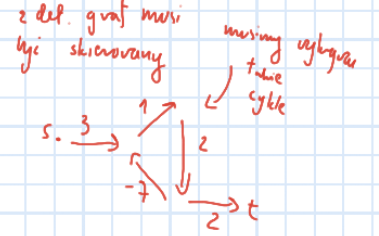

4. Złożoność:
    - $O(VE)$

Dlaczego $(3.)$ wykrywa ujemne cykle? 

Dowód niewprost
 - Dany jest cykl:

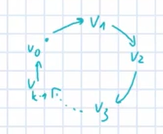

Wtedy:
 - $\sum_{i=0}^{k-1} w(v_i,v_{i+1}) < 0$ $(v_k=v_0)$ 
 - Jeśli weryfikacja tego nie wykryła, to dla każdego:
    - $ v_i.d \leq v_{i-1}.d + w(v_{i-1},v_i)$, Po zsumowaniu tych nierówności, mamy:
    - $\sum_{i=1}^{k} v_i.d \leq \sum_{i=1}^{k}( v_{i-1}.d + w(v_{i-1},v_i))$
 - zwróćmy uwagę, że w nierówności wyżej mamy tożsame sumy: $\sum_{i=1}^{k} v_i.d$ oraz $\sum_{i=1}^{k} v_{i-1}.d$ jako, że w jednej sumujemy od $v_1$ do $v_k$, a drugiej $v_0$ do $v_{k-1}$, to są one równe z dokładnością do indeksu, bo leżą na tym samym cyklu. Odejmując stronami mamy:
    - $\sum_{i=1}^{k} w(v_{i-1},v_i) \geq 0$, co jest oczywistą sprzecznością wynikającą z pierwszego podpunktu.
 - Zatem osiągnęliśmy sprzeczność
    

In [19]:
def relax(parent,d,v,u,c):
    if d[v]>d[u]+c:
        d[v]=d[u]+c
        parent[v]=u
        return True
    return False


def BellmannFord(G,s):
    from math import inf
    n=len(G)
    d=[inf for _ in range(n)]
    d[s]=0
    parent=[None for _ in range(n)]
    
    for i in range(n):
        for u in range(n):
            for v,w in G[u]:
                relax(parent,d,v,u,w)
    
    for i in range(n):
        for u in range(n):
            for v,w in G[u]:
                if d[v]>d[u]+w:
                    d[v]=-inf
                    
    return d,parent

G=[
    [(1, 5)], 
    [(6, 60), (5, 30), (2, 20)], 
    [(3, 10), (4, 75)], 
    [(2, -15)], 
    [(9, 100)], 
    [(6, 5), (8, 50), (4, 25)], 
    [(7, -50)], 
    [(8, -10)], 
    [],
    []
]

def shortest_path(G,s,t):
    from math import inf
    d,parent=BellmannFord(G,s)
    if d[t]==inf:
        return None
    else:
        path=[]
        while parent[t]!=None:
            path.append(t)
            t=parent[t]
        path.append(s)
        return path[::-1]
            
print(BellmannFord(G,0))

print(shortest_path(G,0,6))
    

([0, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf], [None, 0, 3, 2, 2, 1, 5, 6, 7, 4])
[0, 1, 5, 6]


W specjalizowanych algorytmach stosuje się reprezentację macierzową
 - $D[u][v]$ - długość najkrótszej ścieżki z $u$ do $v$
 - $P[u][v]$ - "parent" - wierzchołek tuż przed $v$ na najkrótszej ścieżce z $u$ do $v$

Najkrótsze ścieżki między każdą parą wierzchołków:
 - $|V|$ wywołań Dijkstry - $O(VElogV)$
 - $|V|$ wywołań Bellmana-Forda - $O(V^2E)$ 

Algorytm Floyda-Warshalla
 - Jeśli znamy najkrótsze ścieżki między każdą parą wierzchołków, które jako wewnętrzne wierzchołki używają ${v_1, ..., v_{k-1}}$, to możemy osiągnąć to samo dla rozszerzonego zbioru ${v_1, ..., v_k}$

Konwencja:
 - $V={v_1, ..., v_n}$
 - $S^{(t)}$ - macierz długości najkrótszych ścieżek opartych o wewnętrzne wierzchołki ze zbioru ${v_1, ..., v_t}$
 - $S^{(0)}$ - macierz wag krawędzi między wierzchołkami ($\infty$ oznacza brak krawędzi)

Algorytm:
 - $O(V^3)$

In [32]:
def floydRelax(S,x,t,y,parent):
    if S[x][t]+S[t][y]<S[x][y]:
        S[x][y]=S[x][t]+S[t][y]
        parent[x][y]=t
        return True
    return False

def FloydWarshall(G):
    from math import inf
    from copy import deepcopy
    n=len(G)
    S=deepcopy(G)
    P=[[None for _ in range(n)] for _ in range(n)]
    for t in range(n):
        for x in range(n):
            for y in range(n):
                floydRelax(S,x,t,y,P)
                    
    for t in range(n):
        for x in range(n):
            for y in range(n):
                if S[x][t]+S[t][y]<S[x][y]:
                    S[x][y]=-inf
                    P[x][y]=-inf # type: ignore
                   
    return S,P

from math import inf

G=[
    [inf, 5, inf, inf, inf, inf, inf, inf, inf, inf],
    [inf, inf, 20, inf, inf, 30, 60, inf, inf, inf],
    [inf, inf, inf, 10, 75, inf, inf, inf, inf, inf],
    [inf, inf, -15, inf, inf, inf, inf, inf, inf, inf],
    [inf, inf, inf, inf, inf, inf, inf, inf, inf, 100],
    [inf, inf, inf, inf, 25, inf, 5, inf, 50, inf],
    [inf, inf, inf, inf, inf, inf, inf, -50, inf, inf],
    [inf, inf, inf, inf, inf, inf, inf, inf, -10, inf],
    [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
    [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
]

out,P=FloydWarshall(G)

def shortest_path_floyd(G,s,t):
    S,P=FloydWarshall(G)
    if P[s][t]==None or P[s][t]<0:
        return None
    else:
        path=[t]
        while P[s][t]!=None:
            path.append(P[s][t])
            t=P[s][t]
        path.append(s)
        return path[::-1]
        
for i in out:
    for w in i:
        print(f'{w:4}', end=' ')
    print()

print(shortest_path_floyd(G,0,8))
print(shortest_path_floyd(G,0,9))
print(shortest_path_floyd(G,0,3))
print(shortest_path_floyd(G,1,7))

 inf    5 -inf -inf -inf   35   40  -10  -20 -inf 
 inf  inf -inf -inf -inf   30   35  -15  -25 -inf 
 inf  inf -inf -inf -inf  inf  inf  inf  inf -inf 
 inf  inf -inf -inf -inf  inf  inf  inf  inf -inf 
 inf  inf  inf  inf  inf  inf  inf  inf  inf  100 
 inf  inf  inf  inf   25  inf    5  -45  -55  125 
 inf  inf  inf  inf  inf  inf  inf  -50  -60  inf 
 inf  inf  inf  inf  inf  inf  inf  inf  -10  inf 
 inf  inf  inf  inf  inf  inf  inf  inf  inf  inf 
 inf  inf  inf  inf  inf  inf  inf  inf  inf  inf 
[0, 1, 5, 6, 7, 8]
None
None
[1, 5, 6, 7]
